In [1]:
# Dependencies and Setup
import pandas as pd
from datetime import datetime 
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Read Ironore_price_market_index_test.csv File and store into Pandas data frame

iron_data_df = pd.read_csv('Outputs/iron_data.csv')
four_bed_two_bath = pd.read_csv('Outputs/four_bed_two_bath_housing.csv')

# ANALYSIS

#### All the analysis tables are from 2007-01(period[M] format) to 2019-06. The date columns are in format 2007-01-01(datetime format) just for plotting purpose(which will not effect elsehwere) as it wouldnot let me plot in period format

### RQ1:Is there increase or decrease in commodity price(iron ore price) over the years?

In [2]:
#Storing the original iron_data in a variable
iron_filtered = iron_data_df
#As the Date column was in object type converting to datetime for plotting purpose
iron_filtered["Date"]=pd.to_datetime(iron_filtered["Date"])
iron_filtered["Date"]=iron_filtered["Date"].astype(str)
iron_filtered["Date"]=pd.to_datetime(iron_filtered["Date"])
#Selecting the iron ore data from year 2007 till 2021
irondata_filtered_df =iron_filtered[(iron_filtered['Date'] >='2007-01-01')& (iron_filtered['Date'] <='2019-06-01')]
irondata_filtered_df.reset_index()
irondata_filtered_df = irondata_filtered_df[["Date","Iron_Price"]]
new_iron_data=irondata_filtered_df.drop_duplicates()
new_iron_data
#irondata_filtered_df.loc[irondata_filtered_df.duplicated(), :]

,Date,Iron_Price
84,2007-01-01,36.63
87,2007-04-01,36.63
90,2007-07-01,36.63
93,2007-10-01,36.63
96,2008-01-01,60.80
...,...,...
229,2019-01-01,83.43
230,2019-01-01,86.37
231,2019-04-01,93.79
232,2019-04-01,97.76


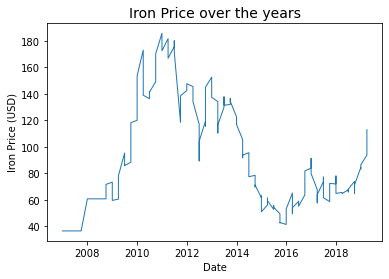

In [3]:
#Setting the x_axis and y_axis from the irondata_filtered dataframe
x_axis=irondata_filtered_df["Date"]
y_axis=irondata_filtered_df["Iron_Price"]

#Figure size
#fig1, ax1 = plt.subplots(figsize=(9,6))

#Setting the x-labels, y-labels and title
plt.xlabel("Date")
plt.ylabel("Iron Price (USD)")
plt.title("Iron Price over the years", fontsize=14)
#plt.xticks(["Q1","Q2","Q3","Q4"],["",'2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019',],rotation='vertical' )
#Plotting the line
plt.plot(x_axis, y_axis, linewidth="1")

#Save the fig
#plt.savefig("images/lineplots.jpg")
plt.show()

## RQ2: Is there increase or decrease in housingprices over the years?

## RQ3: Is there coorelation between housing prices and commodity prices?

##### The house prices are unevenly distributed over the month of that year so I have averaged the house prices for each month so that our data would look uniform

### Houses with 4 Bedroom and 2 bathroom

### Perth

In [4]:
#For Perth 4 bed and 2 bathroom
#Filter as per city and then upto date required
fourbed_twobath_perth=four_bed_two_bath[four_bed_two_bath['CITY']=="Perth"]
fourbed_twobath_perthonly=fourbed_twobath_perth[fourbed_twobath_perth['Date']<="2019-06"]
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#Using groupby by date to calculate average house price month wise
#Then converting series to a dataframe
perth_4bed2bath_edited = fourbed_twobath_perthonly.groupby("Date")["PRICE"].mean()
perth_4bed2bath_avgprice = pd.DataFrame({'Date':perth_4bed2bath_edited.index, 'Average_Houseprice_Perth':perth_4bed2bath_edited.values})

#As the date type is in period which cant be plotted in graph so converting to datetime
perth_4bed2bath_avgprice_final =perth_4bed2bath_avgprice
perth_4bed2bath_avgprice_final["Date"]=perth_4bed2bath_avgprice_final["Date"].astype(str)
perth_4bed2bath_avgprice_final["Date"]=pd.to_datetime(perth_4bed2bath_avgprice_final["Date"])
perth_4bed2bath_avgprice_final.head()

,Date,Average_Houseprice_Perth
0,2007-01-01,892000.00
1,2007-04-01,869633.33
2,2007-07-01,850222.22
3,2007-10-01,848909.09
4,2008-01-01,812615.38


In [5]:
#For Sydney 4 bed and 2 bathroom
#Filter as per city and then upto date required
fourbed_twobath_sydney=four_bed_two_bath[four_bed_two_bath['CITY']=="Sydney"]
fourbed_twobath_sydneyonly=fourbed_twobath_sydney[fourbed_twobath_sydney['Date']<="2019-06"]
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#Using groupby by date to calculate average house price month wise
#Then converting series to a dataframe
sydney_4bed2bath_edited = fourbed_twobath_sydneyonly.groupby("Date")["PRICE"].mean()
sydney_4bed2bath_avgprice = pd.DataFrame({'Date':sydney_4bed2bath_edited.index, 'Average_Houseprice_Sydney':sydney_4bed2bath_edited.values})

#As the date type is in period which cant be plotted in graph so converting to datetime
sydney_4bed2bath_avgprice_final =sydney_4bed2bath_avgprice
sydney_4bed2bath_avgprice_final["Date"]=sydney_4bed2bath_avgprice_final["Date"].astype(str)
sydney_4bed2bath_avgprice_final["Date"]=pd.to_datetime(sydney_4bed2bath_avgprice_final["Date"])
sydney_4bed2bath_avgprice_final.head()

,Date,Average_Houseprice_Sydney
0,2007-01-01,763464.36
1,2007-04-01,1011212.96
2,2007-07-01,933351.85
3,2007-10-01,994728.07
4,2008-01-01,1062655.85


##### Combined Dataframe with iron prices and Perth/Sydney houseprice with 4 bedroom and 2 bathroom

In [6]:
#Merging the irondata, perth and sydney house prices with 4 bedroom and 2 bathroom
houses_4bed2bath_iron_combined = new_iron_data.merge(perth_4bed2bath_avgprice_final.merge(sydney_4bed2bath_avgprice_final, on="Date"), on="Date")
houses_4bed2bath_iron_combined.head()

,Date,Iron_Price,Average_Houseprice_Perth,Average_Houseprice_Sydney
0,2007-01-01,36.63,892000.00,763464.36
1,2007-04-01,36.63,869633.33,1011212.96
2,2007-07-01,36.63,850222.22,933351.85
3,2007-10-01,36.63,848909.09,994728.07
4,2008-01-01,60.80,812615.38,1062655.85


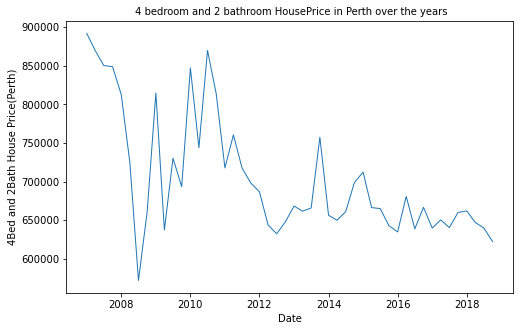

In [7]:
#Setting the x_axis and y_axis from the irondata_filtered dataframe
x_axis=houses_4bed2bath_iron_combined["Date"]
y_axis=houses_4bed2bath_iron_combined["Average_Houseprice_Perth"]

#Figure size
fig1, ax1 = plt.subplots(figsize=(8,5))

#Setting the x-labels, y-labels and title
plt.xlabel("Date")
plt.ylabel("4Bed and 2Bath House Price(Perth)")
plt.title(" 4 bedroom and 2 bathroom HousePrice in Perth over the years", fontsize=10)
ax1.ticklabel_format(style='plain')

#Plotting the line
plt.plot(x_axis, y_axis, linewidth="1")

#Save the fig
#plt.savefig("images/lineplots.jpg")
plt.show()

#####  Note :The highest value showing in 2007 in the above graph is the price in Upper Swan Suburb

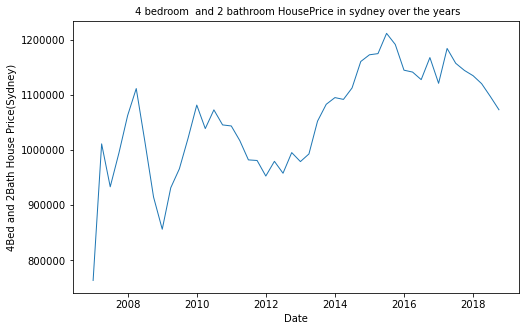

In [8]:
#Setting the x_axis and y_axis from the irondata_filtered dataframe
x_axis=houses_4bed2bath_iron_combined["Date"]
y_axis=houses_4bed2bath_iron_combined["Average_Houseprice_Sydney"]

#Figure size
fig1, ax1 = plt.subplots(figsize=(8,5))

#Setting the x-labels, y-labels and title
plt.xlabel("Date")
plt.ylabel("4Bed and 2Bath House Price(Sydney)")
plt.title(" 4 bedroom  and 2 bathroom HousePrice in sydney over the years", fontsize=10)
ax1.ticklabel_format(style='plain')

#Plotting the line
plt.plot(x_axis, y_axis, linewidth="1")

#Save the fig
#plt.savefig("images/lineplots.jpg")
plt.show()

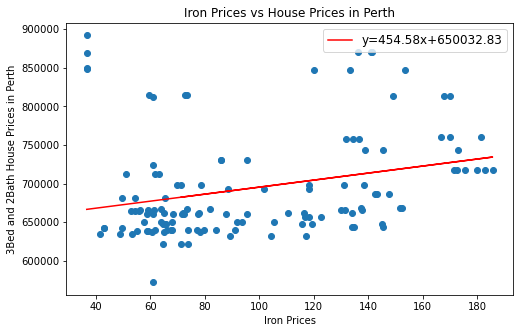

The correlation between iron prices and 4 bedroom and 2 bathroom house prices in perth is 0.28


In [9]:
#Setting the x_axis and y_axis 
x_values=houses_4bed2bath_iron_combined["Iron_Price"]
y_values=houses_4bed2bath_iron_combined["Average_Houseprice_Perth"]

fig1, ax1 = plt.subplots(figsize=(8,5))

#regression part
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope+intercept
line_eq =f"y= {round(slope,2)} x + {round(intercept,2)}"

# Using scatter plot to see if they are correlated
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
ax1.ticklabel_format(style='plain')

plt.xlabel('Iron Prices')
plt.ylabel('3Bed and 2Bath House Prices in Perth')
plt.title('Iron Prices vs House Prices in Perth')
plt.legend(fontsize=12, loc="best")
plt.show()

#Computing the Pearson correlation coefficient
iron_price = houses_4bed2bath_iron_combined.iloc[:,1]
perth_houseprice = houses_4bed2bath_iron_combined.iloc[:,2]

correlation = st.pearsonr(iron_price,perth_houseprice)
print(f"The correlation between iron prices and 4 bedroom and 2 bathroom house prices in perth is {round(correlation[0],2)}")

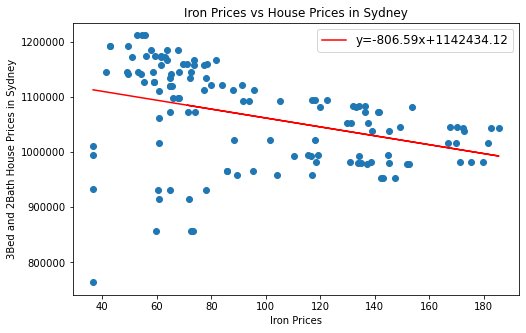

The correlation between iron prices and 4 bedroom and 2 bathroom house prices in Sydney is -0.37


In [10]:
#Setting the x_axis and y_axis 
x_values=houses_4bed2bath_iron_combined["Iron_Price"]
y_values=houses_4bed2bath_iron_combined["Average_Houseprice_Sydney"]

fig1, ax1 = plt.subplots(figsize=(8,5))

#regression part
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope+intercept
line_eq =f"y= {round(slope,2)} x + {round(intercept,2)}"

# Using scatter plot to see if they are correlated
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
ax1.ticklabel_format(style='plain')

plt.xlabel('Iron Prices')
plt.ylabel('3Bed and 2Bath House Prices in Sydney')
plt.title('Iron Prices vs House Prices in Sydney')
plt.legend(fontsize=12, loc="best")
plt.show()

#Computing the Pearson correlation coefficient
iron_price = houses_4bed2bath_iron_combined.iloc[:,1]
sydney_houseprice = houses_4bed2bath_iron_combined.iloc[:,3]

correlation = st.pearsonr(iron_price,sydney_houseprice)
print(f"The correlation between iron prices and 4 bedroom and 2 bathroom house prices in Sydney is {round(correlation[0],2)}")

### Performing T test for Iron Prices vs Perth House prices with 4 bedroom and 2 bathroom

* Checking the assumptions related to ttest

In [11]:
#calculating the standard deviation
population1= houses_4bed2bath_iron_combined["Iron_Price"].mean()
population2_perth= houses_4bed2bath_iron_combined["Average_Houseprice_Perth"].mean()

population1_std= np.std(houses_4bed2bath_iron_combined["Iron_Price"])
population2_perth_std= np.std(houses_4bed2bath_iron_combined["Average_Houseprice_Perth"])

population1_std, population2_perth_std

(41.058782670665856, 67801.29885068383)

NormaltestResult(statistic=25.049976490823138, pvalue=3.6346845013894477e-06)


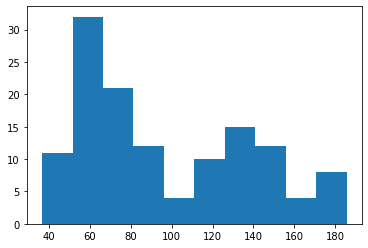

In [12]:
#Checking the normality for iron price
plt.hist(houses_4bed2bath_iron_combined["Iron_Price"])
print(st.normaltest(houses_4bed2bath_iron_combined["Iron_Price"]))

NormaltestResult(statistic=29.318885045337833, pvalue=4.3001638571584274e-07)


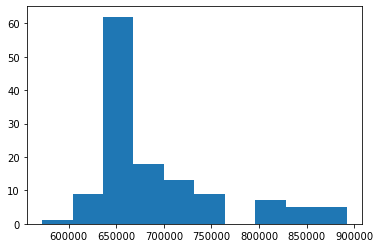

In [13]:
#Checking the normality for perth houses
plt.hist(houses_4bed2bath_iron_combined["Average_Houseprice_Perth"])
print(st.normaltest(houses_4bed2bath_iron_combined["Average_Houseprice_Perth"]))

### Perth T test result

In [14]:
st.ttest_ind(houses_4bed2bath_iron_combined["Iron_Price"],houses_4bed2bath_iron_combined["Average_Houseprice_Perth"],equal_var= False)

Ttest_indResult(statistic=-115.79849889492345, pvalue=1.9626610860184494e-131)

### Performing T test for Iron Prices vs Sydney House prices with 4 bedroom and 2 bathroom

* Checking the assumptions related to ttest

In [15]:
#calculating the standard deviation
population1= houses_4bed2bath_iron_combined["Iron_Price"].mean()
population2_perth= houses_4bed2bath_iron_combined["Average_Houseprice_Sydney"].mean()

population1_std= np.std(houses_4bed2bath_iron_combined["Iron_Price"])
population2_perth_std= np.std(houses_4bed2bath_iron_combined["Average_Houseprice_Sydney"])

population1_std, population2_perth_std

(41.058782670665856, 88642.33102201151)

NormaltestResult(statistic=5.58743137323267, pvalue=0.061193415408516326)


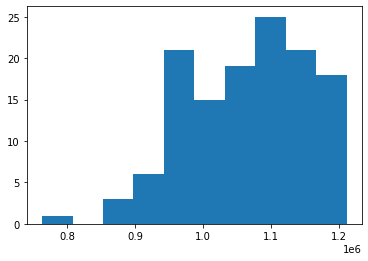

In [16]:
#Checking the normality for sydney houses
plt.hist(houses_4bed2bath_iron_combined["Average_Houseprice_Sydney"])
print(st.normaltest(houses_4bed2bath_iron_combined["Average_Houseprice_Sydney"]))

### Sydney T test result

In [17]:
st.ttest_ind(houses_4bed2bath_iron_combined["Iron_Price"],houses_4bed2bath_iron_combined["Average_Houseprice_Sydney"],equal_var= False)

Ttest_indResult(statistic=-135.82961086915986, pvalue=3.1253314697288555e-140)